**Group Members:** Muhammad Shayan (CS-19041), Syed Muhammad Hammad (CS-19040)

In [110]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

## Data Pre-Processing

In [111]:
dataset = pd.read_csv('The_Grades_Dataset.csv')
dataset

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [112]:
#Dropping all rows that have more than 5 null values
cleanedDataset = dataset.dropna(thresh=38)
#Replacing remaining null values with WN
cleanedDataset.fillna('WN', inplace=True)
cleanedDataset

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [113]:
#Extracting all the grades present in dataset
grades = np.unique(cleanedDataset.iloc[:,1:-1].values).tolist()
order = [1, 0, 2, 4, 3, 5, 7, 6, 8, 10, 9, 11, 12, 13, 14]
grades = [grades[i] for i in order]
grades

['A+',
 'A',
 'A-',
 'B+',
 'B',
 'B-',
 'C+',
 'C',
 'C-',
 'D+',
 'D',
 'F',
 'W',
 'WN',
 'WU']

In [114]:
#Replacing all the grades with appropriate numerical values
values = np.linspace(1.0,4.0,11).tolist() + [0.0] * 4
processedDataset = cleanedDataset.replace(to_replace = grades, value = values)
# processedDataset.to_csv('The_Grades_Dataset_Cleaned.csv')
processedDataset

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,2.5,3.7,3.4,3.1,3.4,3.7,4.0,3.4,2.5,...,3.4,3.4,3.4,3.4,1.6,1.3,3.4,2.2,1.6,2.205
1,CS-97002,1.3,4.0,3.7,4.0,2.5,3.1,4.0,1.3,3.7,...,3.7,4.0,3.1,4.0,1.6,2.5,3.1,3.1,2.2,2.008
2,CS-97003,1.3,2.2,1.3,2.5,1.9,1.3,2.5,1.9,1.6,...,2.2,2.2,1.3,3.1,1.3,1.3,1.3,1.6,1.3,3.608
3,CS-97004,4.0,2.8,3.7,4.0,4.0,1.6,3.7,3.4,4.0,...,3.7,3.1,3.7,3.4,2.5,2.2,2.8,2.8,2.8,1.906
4,CS-97005,1.6,1.6,1.6,1.9,1.3,1.3,1.6,1.9,1.3,...,2.5,1.9,1.9,2.5,1.6,1.3,1.6,1.6,1.3,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,2.2,1.3,1.3,1.6,1.0,1.3,1.6,1.6,1.0,...,1.6,1.6,1.3,1.3,1.3,1.9,1.9,2.2,1.3,3.798
567,CS-97568,1.0,1.3,1.3,1.3,1.3,1.3,1.3,1.6,1.3,...,1.9,1.9,1.3,1.3,1.6,2.2,1.6,3.1,1.6,3.772
568,CS-97569,2.2,1.3,1.6,1.9,1.3,1.3,1.3,1.3,1.3,...,1.6,2.2,1.3,1.9,1.3,3.1,1.9,1.6,1.6,3.470
569,CS-97570,1.3,1.9,4.0,1.3,4.0,3.7,2.5,3.4,2.5,...,4.0,2.2,2.2,3.4,4.0,3.1,2.2,2.5,3.1,2.193


## Exploratory Data Analysis (EDA)

In [115]:
processedDataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 559 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   559 non-null    object 
 1   PH-121     559 non-null    float64
 2   HS-101     559 non-null    float64
 3   CY-105     559 non-null    float64
 4   HS-105/12  559 non-null    float64
 5   MT-111     559 non-null    float64
 6   CS-105     559 non-null    float64
 7   CS-106     559 non-null    float64
 8   EL-102     559 non-null    float64
 9   EE-119     559 non-null    float64
 10  ME-107     559 non-null    float64
 11  CS-107     559 non-null    float64
 12  HS-205/20  559 non-null    float64
 13  MT-222     559 non-null    float64
 14  EE-222     559 non-null    float64
 15  MT-224     559 non-null    float64
 16  CS-210     559 non-null    float64
 17  CS-211     559 non-null    float64
 18  CS-203     559 non-null    float64
 19  CS-214     559 non-null    float64
 20  EE-217     559 

In [116]:
processedDataset.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.00000,559.000000,559.000000,559.000000,559.000000,...,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
mean,2.160286,2.545081,1.919857,2.281574,2.186047,1.87424,2.226834,2.195707,2.179606,2.455993,...,2.188730,2.415385,2.087657,2.505725,1.641503,1.740966,2.175313,2.191234,1.685689,2.982506
std,0.860439,0.813136,0.800459,0.914460,0.827042,0.72333,0.741351,0.856652,0.728389,0.900356,...,0.983373,0.804632,0.787133,0.851208,0.904843,0.634368,0.669322,0.796663,0.871148,0.588974
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.658000
25%,1.600000,1.900000,1.300000,1.600000,1.600000,1.30000,1.600000,1.600000,1.600000,1.600000,...,1.300000,1.900000,1.300000,1.900000,1.300000,1.300000,1.600000,1.600000,1.300000,2.568000
50%,1.900000,2.500000,1.600000,2.200000,1.900000,1.60000,2.200000,1.900000,1.900000,2.200000,...,1.900000,2.500000,1.900000,2.500000,1.600000,1.600000,2.200000,1.900000,1.600000,3.043000
75%,2.800000,3.100000,2.200000,3.100000,2.800000,2.20000,2.500000,2.800000,2.800000,3.100000,...,3.100000,3.100000,2.500000,3.100000,2.200000,1.900000,2.500000,2.800000,2.200000,3.464000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.985000


## Model Implementation without Python Package

### Implementation of Linear Regressor

In [117]:
class LinearRegressionImplemented:
    def __init__(self):
        self.theta = None

    def fit(self, X, y):
        # Add intercept term to X
        X = np.column_stack((np.ones(len(X)), X))

        # Calculate theta using the normal equation
        self.theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    def predict(self, X):
        # Add intercept term to X
        X = np.column_stack((np.ones(len(X)), X))

        # Calculate predictions
        return X.dot(self.theta)

    def score(self, X, y):
        # Predict the output
        y_pred = self.predict(X)

        # Calculate the total sum of squares (SS_tot)
        ss_tot = np.sum((y - np.mean(y)) ** 2)

        # Calculate the residual sum of squares (SS_res)
        ss_res = np.sum((y - y_pred) ** 2)

        # Calculate R^2 score
        r2_score = 1 - (ss_res / ss_tot)

        return r2_score

### Implementation of KNNRegressor

In [118]:
class KNNRegressorImplemented:
    def __init__(self, n_neighbors=5, metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.metric = metric
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def _compute_distances(self, X):
        if self.metric == 'euclidean':
            # Calculate Euclidean distance
            distances = np.sqrt(np.sum((self.X_train[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=2))
        elif self.metric == 'manhattan':
            # Calculate Manhattan distance
            distances = np.sum(np.abs(self.X_train[:, np.newaxis, :] - X[np.newaxis, :, :]), axis=2)
        else:
            raise ValueError("Unsupported metric")
        return distances

    def predict(self, X):
        distances = self._compute_distances(X)
        indices = np.argsort(distances, axis=0)[:self.n_neighbors]
        k_nearest_values = self.y_train[indices]
        predictions = np.mean(k_nearest_values, axis=0)
        return predictions

    def score(self, X, y):
        y_pred = self.predict(X)
        mse = np.mean((y - y_pred) ** 2)
        return mse

## Model Training

### Model 1

In [119]:
target = processedDataset[['CGPA']]
target

,CGPA
0,2.205
1,2.008
2,3.608
3,1.906
4,3.448
...,...
566,3.798
567,3.772
568,3.470
569,2.193


In [120]:
#Filtering dataset for first year subjects
firstYearPredictors = processedDataset.filter(regex = '[A-Z]{2}-1.*', axis = 1)
firstYearPredictors

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107
0,2.5,3.7,3.4,3.1,3.4,3.7,4.0,3.4,2.5,3.4,3.4
1,1.3,4.0,3.7,4.0,2.5,3.1,4.0,1.3,3.7,4.0,1.9
2,1.3,2.2,1.3,2.5,1.9,1.3,2.5,1.9,1.6,1.6,2.5
3,4.0,2.8,3.7,4.0,4.0,1.6,3.7,3.4,4.0,2.8,4.0
4,1.6,1.6,1.6,1.9,1.3,1.3,1.6,1.9,1.3,1.6,3.1
...,...,...,...,...,...,...,...,...,...,...,...
566,2.2,1.3,1.3,1.6,1.0,1.3,1.6,1.6,1.0,1.9,1.0
567,1.0,1.3,1.3,1.3,1.3,1.3,1.3,1.6,1.3,1.3,1.0
568,2.2,1.3,1.6,1.9,1.3,1.3,1.3,1.3,1.3,2.2,1.0
569,1.3,1.9,4.0,1.3,4.0,3.7,2.5,3.4,2.5,3.4,1.0


In [121]:
#Splitting dataset into train and test samples with 80/20 ratio
M1Features_train, M1Features_test, M1Target_train, M1Target_test = train_test_split(firstYearPredictors, target, test_size=0.2, random_state=0)

#### KNN Regressor

In [122]:
#Testing different nearest neighbours and metric values and plotting in a graph
M1manhattan_scores = []
M1euclidean_scores = []
for i in range(1,51):
    #For manhattan distance metric
    M1knnM = KNeighborsRegressor(n_neighbors=i, metric='manhattan')
    M1knnM.fit(M1Features_train, M1Target_train)
    M1manhattan_scores.append(M1knnM.score(M1Features_test, M1Target_test))
    #For euclidean distance metric
    M1knnE = KNeighborsRegressor(n_neighbors=i, metric='euclidean')
    M1knnE.fit(M1Features_train, M1Target_train)
    M1euclidean_scores.append(M1knnE.score(M1Features_test, M1Target_test))
print("Best number of neighbours for Manhattan:",M1manhattan_scores.index(max(M1manhattan_scores)))
print("Best number of neighbours for Euclidean:",M1euclidean_scores.index(max(M1euclidean_scores)))

Best number of neighbours for Manhattan: 6
Best number of neighbours for Euclidean: 11


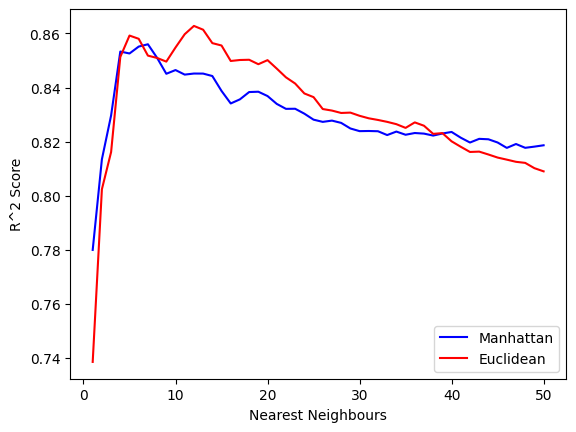

In [123]:
plt.plot(range(1,51), M1manhattan_scores, color="blue", linestyle="-", label="Manhattan")
plt.plot(range(1,51), M1euclidean_scores, color="red", linestyle="-", label="Euclidean")
plt.xlabel("Nearest Neighbours")
plt.ylabel("R^2 Score")
plt.legend(loc='lower right')
plt.show()

#### Linear Regressor

In [124]:
M1lr = LinearRegression().fit(M1Features_train, M1Target_train)
print('Coefficients:', M1lr.coef_)
print('Intercept:',M1lr.intercept_)
print('Train Score:', M1lr.score(M1Features_train, M1Target_train))
print('Test Score:', M1lr.score(M1Features_test, M1Target_test))

Coefficients: [[-0.04639856 -0.04303003 -0.04623374 -0.07764354 -0.17637916 -0.01771552
  -0.09028658 -0.10835779 -0.11040024 -0.12399356 -0.05840902]]
Intercept: [4.9947324]
Train Score: 0.8544957947000738
Test Score: 0.8641420283539425


In [125]:
M1lrown = LinearRegressionImplemented()
M1lrown.fit(M1Features_train, M1Target_train)
print('Coefficients:', M1lrown.theta[1:])
print('Intercept:', M1lrown.theta[0])
print('Train Score:', M1lrown.score(M1Features_train, M1Target_train))
print('Test Score:', M1lrown.score(M1Features_test, M1Target_test))

Coefficients: [[-0.04639856]
 [-0.04303003]
 [-0.04623374]
 [-0.07764354]
 [-0.17637916]
 [-0.01771552]
 [-0.09028658]
 [-0.10835779]
 [-0.11040024]
 [-0.12399356]
 [-0.05840902]]
Intercept: [4.9947324]
Train Score: CGPA    0.854496
dtype: float64
Test Score: CGPA    0.864142
dtype: float64


### Model 2

In [126]:
secondYearPredictors = processedDataset.filter(regex = '[A-Z]{2}-[12].*', axis = 1)
secondYearPredictors

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,MT-222,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215
0,2.5,3.7,3.4,3.1,3.4,3.7,4.0,3.4,2.5,3.4,...,4.0,1.6,2.5,2.8,3.7,3.7,4.0,1.3,4.0,3.4
1,1.3,4.0,3.7,4.0,2.5,3.1,4.0,1.3,3.7,4.0,...,2.5,3.4,3.7,3.7,4.0,3.1,4.0,2.5,3.1,4.0
2,1.3,2.2,1.3,2.5,1.9,1.3,2.5,1.9,1.6,1.6,...,1.3,1.3,1.3,1.3,1.0,1.3,1.6,1.3,1.6,1.3
3,4.0,2.8,3.7,4.0,4.0,1.6,3.7,3.4,4.0,2.8,...,3.7,2.5,4.0,3.1,1.9,2.8,4.0,3.7,4.0,4.0
4,1.6,1.6,1.6,1.9,1.3,1.3,1.6,1.9,1.3,1.6,...,1.3,1.6,1.6,1.6,2.5,1.3,1.6,1.3,1.6,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,2.2,1.3,1.3,1.6,1.0,1.3,1.6,1.6,1.0,1.9,...,1.0,1.3,1.3,1.3,1.3,1.0,1.3,1.3,2.2,1.6
567,1.0,1.3,1.3,1.3,1.3,1.3,1.3,1.6,1.3,1.3,...,2.8,1.6,2.2,1.3,1.3,1.0,1.0,1.3,1.3,2.2
568,2.2,1.3,1.6,1.9,1.3,1.3,1.3,1.3,1.3,2.2,...,2.2,1.9,2.2,1.6,1.3,1.9,2.2,1.3,1.9,2.2
569,1.3,1.9,4.0,1.3,4.0,3.7,2.5,3.4,2.5,3.4,...,4.0,4.0,2.2,2.5,2.2,2.5,3.1,2.5,3.7,3.7


In [127]:
M2Features_train, M2Features_test, M2Target_train, M2Target_test = train_test_split(secondYearPredictors, target, test_size=0.2, random_state=0)

#### KNN Regressor

In [128]:
M2manhattan_scores = []
M2euclidean_scores = []
for i in range(1,51):
    #For manhattan distance metric
    M2knnM = KNeighborsRegressor(n_neighbors=i, metric='manhattan')
    M2knnM.fit(M2Features_train, M2Target_train)
    M2manhattan_scores.append(M2knnM.score(M2Features_test, M2Target_test))
    #For euclidean distance metric
    M2knnE = KNeighborsRegressor(n_neighbors=i, metric='euclidean')
    M2knnE.fit(M2Features_train, M2Target_train)
    M2euclidean_scores.append(M2knnE.score(M2Features_test, M2Target_test))

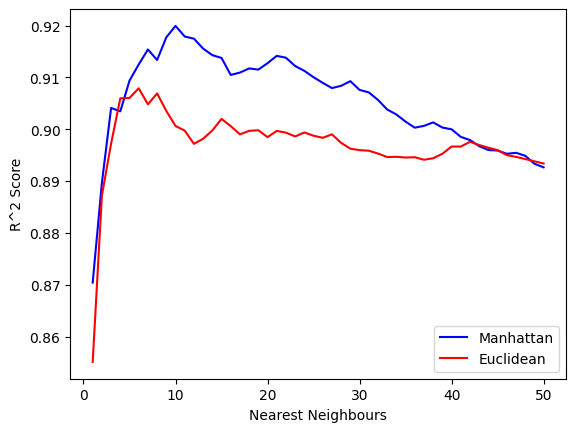

In [129]:
plt.plot(range(1,51), M2manhattan_scores, color="blue", linestyle="-", label="Manhattan")
plt.plot(range(1,51), M2euclidean_scores, color="red", linestyle="-", label="Euclidean")
plt.xlabel("Nearest Neighbours")
plt.ylabel("R^2 Score")
plt.legend(loc='lower right')
plt.show()

#### Linear Regressor

In [130]:
M2lr = LinearRegression().fit(M2Features_train, M2Target_train)
print('Coefficients:', M2lr.coef_)
print('Intercept:',M2lr.intercept_)
print('Train Score:', M2lr.score(M2Features_train, M2Target_train))
print('Test Score:', M2lr.score(M2Features_test, M2Target_test))

Coefficients: [[-0.01898178 -0.04131438 -0.02487333 -0.03775184 -0.04078895 -0.02402571
  -0.03497617 -0.01786596 -0.05924552 -0.02275894 -0.07301944 -0.07004086
  -0.00553217 -0.03138349 -0.09668263 -0.13686185 -0.02646162 -0.03067061
  -0.06496272 -0.05651936 -0.04873205 -0.04007188]]
Intercept: [5.20942105]
Train Score: 0.9445674575103566
Test Score: 0.9191676155827483


### Model 3

In [131]:
thirdYearPredictors = processedDataset.filter(regex = r'[A-Z]{2}-[123].*', axis = 1)
thirdYearPredictors

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,EF-303,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317
0,2.5,3.7,3.4,3.1,3.4,3.7,4.0,3.4,2.5,3.4,...,3.4,2.8,2.2,3.1,2.8,3.1,3.4,3.1,3.4,3.4
1,1.3,4.0,3.7,4.0,2.5,3.1,4.0,1.3,3.7,4.0,...,4.0,3.4,1.6,3.7,3.4,3.1,1.6,4.0,3.7,4.0
2,1.3,2.2,1.3,2.5,1.9,1.3,2.5,1.9,1.6,1.6,...,2.8,1.3,1.9,1.6,2.2,1.9,1.6,1.6,2.2,2.2
3,4.0,2.8,3.7,4.0,4.0,1.6,3.7,3.4,4.0,2.8,...,4.0,2.5,4.0,2.5,3.7,3.7,1.9,3.4,3.7,3.1
4,1.6,1.6,1.6,1.9,1.3,1.3,1.6,1.9,1.3,1.6,...,3.4,1.6,2.5,1.6,2.8,1.6,2.5,1.6,2.5,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,2.2,1.3,1.3,1.6,1.0,1.3,1.6,1.6,1.0,1.9,...,2.2,1.6,1.6,1.3,1.0,1.3,1.3,1.9,1.6,1.6
567,1.0,1.3,1.3,1.3,1.3,1.3,1.3,1.6,1.3,1.3,...,1.3,1.3,1.3,1.3,1.3,1.3,1.0,1.6,1.9,1.9
568,2.2,1.3,1.6,1.9,1.3,1.3,1.3,1.3,1.3,2.2,...,2.2,2.5,1.9,1.9,1.3,2.2,2.8,1.9,1.6,2.2
569,1.3,1.9,4.0,1.3,4.0,3.7,2.5,3.4,2.5,3.4,...,4.0,3.1,3.1,2.8,3.4,4.0,2.5,1.9,4.0,2.2


In [132]:
M3Features_train, M3Features_test, M3Target_train, M3Target_test = train_test_split(thirdYearPredictors, target, test_size=0.2, random_state=0)

#### KNN Regressor

In [133]:
M3manhattan_scores = []
M3euclidean_scores = []
for i in range(1,51):
    #For manhattan distance metric
    M3knnM = KNeighborsRegressor(n_neighbors=i, metric='manhattan')
    M3knnM.fit(M3Features_train, M3Target_train)
    M3manhattan_scores.append(M3knnM.score(M3Features_test, M3Target_test))
    #For euclidean distance metric
    M3knnE = KNeighborsRegressor(n_neighbors=i, metric='euclidean')
    M3knnE.fit(M3Features_train, M3Target_train)
    M3euclidean_scores.append(M3knnE.score(M3Features_test, M3Target_test))

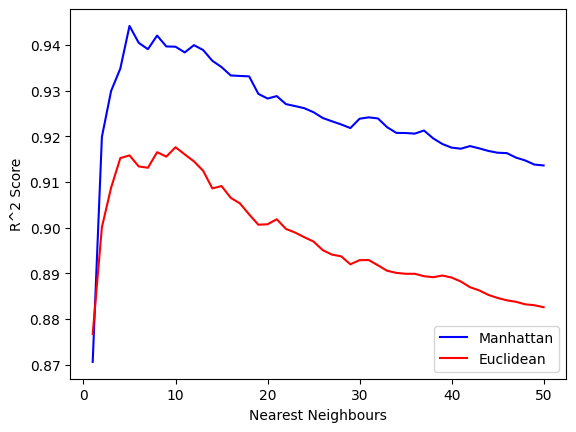

In [134]:
plt.plot(range(1,51), M3manhattan_scores, color="blue", linestyle="-", label="Manhattan")
plt.plot(range(1,51), M3euclidean_scores, color="red", linestyle="-", label="Euclidean")
plt.xlabel("Nearest Neighbours")
plt.ylabel("R^2 Score")
plt.legend(loc='lower right')
plt.show()

#### Linear Regressor

In [135]:
M3lr = LinearRegression().fit(M3Features_train, M3Target_train)
print('Coefficients:', M3lr.coef_)
print('Intercept:',M3lr.intercept_)
print('Train Score:', M3lr.score(M3Features_train, M3Target_train))
print('Test Score:', M3lr.score(M3Features_test, M3Target_test))

Coefficients: [[-0.03593784 -0.03245635 -0.03327399 -0.01487956 -0.01207195 -0.02432495
  -0.01864194 -0.01574928 -0.06637664 -0.03952688 -0.03743412 -0.04901745
  -0.01474735 -0.01482149 -0.03058261 -0.05132582 -0.01162476 -0.0274375
  -0.02552016 -0.04893523 -0.00549615 -0.03002313 -0.0438724  -0.00129533
  -0.00503675 -0.09916295 -0.07134739 -0.04293687 -0.01859666  0.0144811
  -0.09315447 -0.01657894 -0.01298805]]
Intercept: [5.26564051]
Train Score: 0.9795202520705261
Test Score: 0.9565116668061806


## Predictions

In [136]:

input = [2.3, 3.5, 3.3, 3.6, 2.5, 2.4, 2.8, 3.7, 4.0, 2.0, 4.0]
input

[2.3, 3.5, 3.3, 3.6, 2.5, 2.4, 2.8, 3.7, 4.0, 2.0, 4.0]

### Model 1

In [137]:
#We use the euclidean distance metric as it gave the highest value for model 1
M1knnPred = KNeighborsRegressor(n_neighbors=M1euclidean_scores.index(max(M1euclidean_scores))+1, metric='euclidean')
M1knnPred.fit(M1Features_train, M1Target_train)
M1knnPred.predict(np.array(input).reshape(1, -1))
M1knnPredValue = np.asarray(M1knnPred.predict(np.array(input).reshape(1, -1)))
np.round_(M1knnPredValue.item() , decimals = 4)

2.3159

In [138]:
# M1lr.predict(np.array(input).reshape(1, -1))
M1lrValue = np.asarray(M1lr.predict(np.array(input).reshape(1, -1)))
np.round_(M1lrValue.item() , decimals = 4)

2.2449

### Model 2

In [139]:
input = [2.3, 3.5, 3.3, 3.6, 2.5, 2.4, 2.8, 3.7, 4.0, 2.0, 4.0, 2.3, 3.5, 3.3, 3.6, 2.5, 2.4, 2.8, 3.7, 4.0, 2.0, 4.0]
# input = [2.5, 3.7, 3.4, 3.1, 3.4, 3.7, 4, 3.4, 2.5, 3.4, 3.4,1.9,4,1.6,2.5,2.8,3.7,3.7,4,1.3,4,3.4]

#We use the manhattan distance metric as it gave the highest value for model 2
M2knnPred = KNeighborsRegressor(n_neighbors=M2manhattan_scores.index(max(M2manhattan_scores))+1, metric='manhattan')
M2knnPred.fit(M2Features_train, M2Target_train)
M2knnPredValue = np.asarray(M2knnPred.predict(np.array(input).reshape(1, -1)))
np.round_(M2knnPredValue.item() , decimals = 4)

2.1995

In [140]:
# M2lr.predict(np.array(input).reshape(1, -1))
M2lrValue = np.asarray(M2lr.predict(np.array(input).reshape(1, -1)))
np.round_(M2lrValue.item() , decimals = 4)

2.0571

### Model 3

In [141]:
input = [2.3, 3.5, 3.3, 3.6, 2.5, 2.4, 2.8, 3.7, 4.0, 2.0, 4.0, 2.3, 3.5, 3.3, 3.6, 2.5, 2.4, 2.8, 3.7, 4.0, 2.0, 4.0, 2.3, 3.5, 3.3, 3.6, 2.5, 2.4, 2.8, 3.7, 4.0, 2.0, 4.0]
# input =['3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2']
#We use the manhattan distance metric as it gave the highest value for model 3
M3knnPred = KNeighborsRegressor(n_neighbors=M3manhattan_scores.index(max(M3manhattan_scores))+1, metric='manhattan')
M3knnPred.fit(M3Features_train, M3Target_train)
# M3knnPred.predict(np.array(input).reshape(1, -1))
M3knnPredValue = np.asarray(M3knnPred.predict(np.array(input).reshape(1, -1)))
np.round_(M3knnPredValue.item() , decimals = 4)

2.0568

In [142]:
# M3lr.predict(np.array(input).reshape(1, -1))
M3lrValue = np.asarray(M3lr.predict(np.array(input).reshape(1, -1)))
np.round_(M3lrValue.item() , decimals = 4)

2.0184

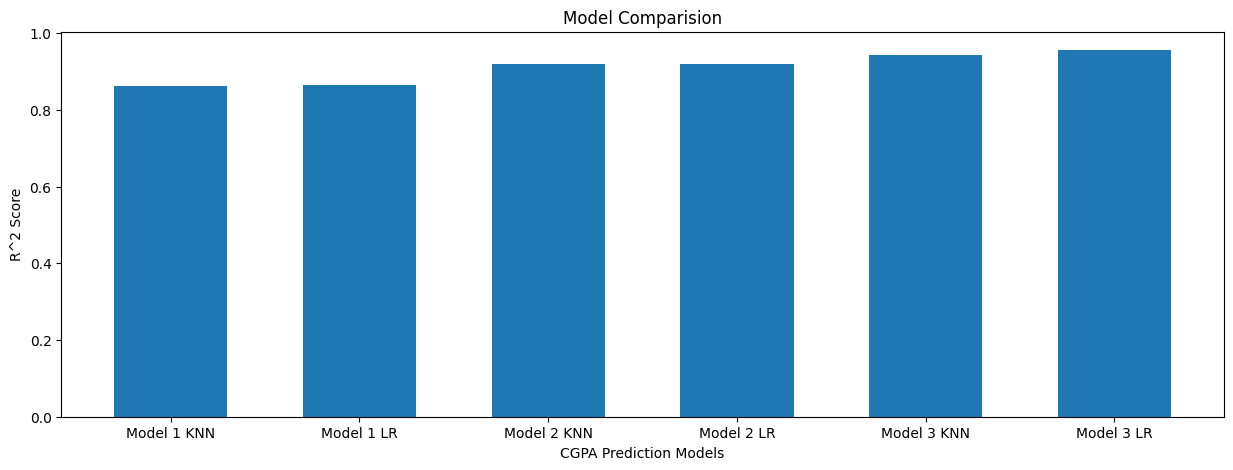

In [143]:
data = {'Model 1 KNN': M1knnPred.score(M1Features_test, M1Target_test),
        'Model 1 LR' : M1lr.score(M1Features_test, M1Target_test),
        'Model 2 KNN': M2knnPred.score(M2Features_test, M2Target_test),
        'Model 2 LR' : M2lr.score(M2Features_test, M2Target_test),
        'Model 3 KNN': M3knnPred.score(M3Features_test, M3Target_test),
        'Model 3 LR' : M3lr.score(M3Features_test, M3Target_test) }
models = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (15, 5))

plt.bar(models, values, width = 0.6)

plt.xlabel("CGPA Prediction Models")
plt.ylabel("R^2 Score")
plt.title("Model Comparision")
plt.show()